In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import alpha_vantage as av
import os

%matplotlib inline

In [6]:
apiKey = os.environ['API_KEY']

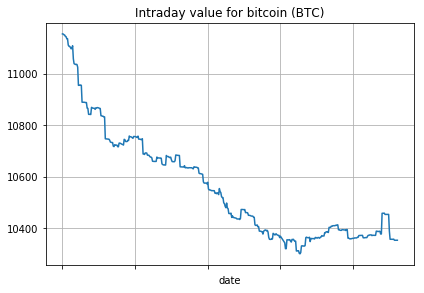

In [10]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

cc = CryptoCurrencies(key=apiKey, output_format='pandas')
data, meta_data = cc.get_digital_currency_intraday(symbol='BTC', market='CNY')
data['1b. price (USD)'].plot()
plt.tight_layout()
plt.title('Intraday value for bitcoin (BTC)')
plt.grid()
plt.show()